# Business License Status Prediction

## Our goal is to perform a multi-class classification of the business license status of various users, from the given dataset.

### Importing libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Importing the datasets

In [2]:
# Importing the dataset
train_data = pd.read_csv("train_file.csv")
train_data.head()

F:\Installed\Anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,22.0,28.0,22-28,10.0,1010,Limited Business License,35342.0,RENEW,NaN,2002-06-28T00:00:00,2002-08-21T00:00:00,N,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,33.0,23.0,33-23,17.0,1315,Mobile Food Dispenser,1358463.0,RENEW,NaN,2005-09-22T00:00:00,2005-11-03T00:00:00,N,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,NaN,NaN,NaN,NaN,1011,Home Repair,1980233.0,ISSUE,2009-06-29T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,N,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,NaN,NaN,NaN,NaN,1010,Limited Business License,1476582.0,ISSUE,2004-02-10T00:00:00,2004-02-10T00:00:00,2004-02-10T00:00:00,N,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,NaN,NaN,NaN,NaN,1010,Limited Business License,1141408.0,RENEW,NaN,2008-03-24T00:00:00,2008-06-04T00:00:00,N,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


In [3]:
train_data.shape

(85895, 32)

In [4]:
# Importing the dataset
test_data = pd.read_csv("test_file.csv")
test_data.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
0,1516615-20120216,2132209,280120,1,RS HOMES I LLC,RS HOMES I LLC,350 W HUBBARD ST 3 300,CHICAGO,IL,60610.0,42.0,67.0,42-67,18.0,1020,Residential Real Estate Developer,1516615.0,RENEW,NaN,2011-12-15T00:00:00,2012-01-19T00:00:00,N,2012-02-16T00:00:00,2014-02-15T00:00:00,2012-01-19T00:00:00,2012-01-20T00:00:00,2012-12-29T00:00:00,NaN,41.890047,-87.637467,"{'latitude': '41.89004724888915', 'longitude':..."
1,69813-20110616,2090759,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,2101 W 59TH ST 1ST,CHICAGO,IL,60636.0,16.0,5.0,16-5,7.0,1010,Limited Business License,69813.0,RENEW,NaN,2011-04-15T00:00:00,2012-11-02T00:00:00,N,2011-06-16T00:00:00,2013-06-15T00:00:00,2012-11-02T00:00:00,2012-11-05T00:00:00,2012-12-29T00:00:00,NaN,41.786485,-87.676665,"{'latitude': '41.786485235679486', 'longitude'..."
2,1519227-20041116,1541990,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,1133 S WABASH AVE 1ST,CHICAGO,IL,60605.0,4.0,8.0,4-8,1.0,1020,Residential Real Estate Developer,1519227.0,RENEW,NaN,2004-09-27T00:00:00,2004-12-06T00:00:00,N,2004-11-16T00:00:00,2005-11-15T00:00:00,2004-12-06T00:00:00,2004-12-07T00:00:00,NaN,NaN,41.868269,-87.625695,"{'latitude': '41.86826924843568', 'longitude':..."
3,1922025-20100816,2041053,335243,1,ANNA F. JAMISON,ANNA F. JAMISON,13156 S FORRESTVILLE AVE,CHICAGO,IL,60827.0,9.0,33.0,9-33,5.0,1607,"Peddler, non-food, special",1922025.0,RENEW,NaN,2010-06-15T00:00:00,2010-11-04T00:00:00,N,2010-08-16T00:00:00,2012-08-15T00:00:00,NaN,2010-11-04T00:00:00,2012-12-31T00:00:00,NaN,41.655762,-87.608686,"{'latitude': '41.65576175146191', 'longitude':..."
4,1675683-20070816,1837158,283018,3,MARINCA A. COVARRUBIAS,DETAILS,4208 S ARCHER AVE,CHICAGO,IL,60632.0,15.0,26.0,15-26,9.0,1010,Limited Business License,1675683.0,RENEW,NaN,2007-06-21T00:00:00,2007-08-15T00:00:00,N,2007-08-16T00:00:00,2009-06-15T00:00:00,2007-08-15T00:00:00,2007-08-16T00:00:00,2008-03-26T00:00:00,39.0,41.816969,-87.699785,"{'latitude': '41.81696910012824', 'longitude':..."


In [5]:
test_data.shape

(57239, 31)

In [6]:
my_submission = pd.DataFrame({'ID': test_data.ID})
my_submission.head()

,ID
0,1516615-20120216
1,69813-20110616
2,1519227-20041116
3,1922025-20100816
4,1675683-20070816


In [7]:
my_submission.shape

(57239, 1)

In [8]:
train_data.columns

Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME', 'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE', 'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE', 'LICENSE DESCRIPTION', 'LICENSE NUMBER', 'APPLICATION TYPE', 'APPLICATION CREATED DATE', 'APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE', 'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE', 'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE', 'DATE ISSUED', 'LICENSE STATUS CHANGE DATE', 'SSA', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'LICENSE STATUS'], dtype='object')

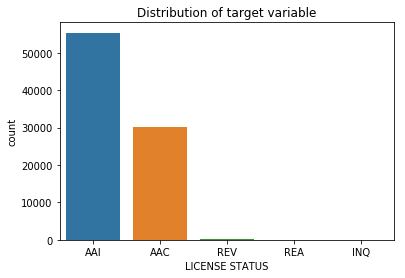

In [9]:
plt.title('Distribution of target variable')
sns.countplot(train_data['LICENSE STATUS'])
plt.show()

In [10]:
# Studying the target variable
train_data['LICENSE STATUS'].value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: LICENSE STATUS, dtype: int64

In [11]:
train_data.isna().sum()

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   1
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                31
WARD                                 49701
PRECINCT                             56701
WARD PRECINCT                        49700
POLICE DISTRICT                      54012
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           1
APPLICATION TYPE                         0
APPLICATION CREATED DATE             64660
APPLICATION REQUIREMENTS COMPLETE      214
PAYMENT DATE                          1289
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                228
LICENSE TER

In [12]:
test_data.isna().sum()

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   2
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                12
WARD                                   626
PRECINCT                              1578
WARD PRECINCT                          616
POLICE DISTRICT                       1475
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           0
APPLICATION TYPE                         0
APPLICATION CREATED DATE             44587
APPLICATION REQUIREMENTS COMPLETE      428
PAYMENT DATE                          1051
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                118
LICENSE TER

In [13]:
train_data.nunique()

ID                                   85895
LICENSE ID                           85895
ACCOUNT NUMBER                       38897
SITE NUMBER                            177
LEGAL NAME                           38744
DOING BUSINESS AS NAME               41686
ADDRESS                              42146
CITY                                  1223
STATE                                   54
ZIP CODE                              2456
WARD                                    50
PRECINCT                                76
WARD PRECINCT                         2383
POLICE DISTRICT                         28
LICENSE CODE                           106
LICENSE DESCRIPTION                    106
LICENSE NUMBER                       49768
APPLICATION TYPE                         5
APPLICATION CREATED DATE              2899
APPLICATION REQUIREMENTS COMPLETE     3078
PAYMENT DATE                          4356
CONDITIONAL APPROVAL                     2
LICENSE TERM START DATE               2825
LICENSE TER

In [14]:
test_data.nunique()

ID                                   57239
LICENSE ID                           57239
ACCOUNT NUMBER                       36724
SITE NUMBER                            297
LEGAL NAME                           36523
DOING BUSINESS AS NAME               39364
ADDRESS                              39637
CITY                                   331
STATE                                   43
ZIP CODE                               420
WARD                                    50
PRECINCT                                76
WARD PRECINCT                         2461
POLICE DISTRICT                         25
LICENSE CODE                           124
LICENSE DESCRIPTION                    124
LICENSE NUMBER                       49383
APPLICATION TYPE                         6
APPLICATION CREATED DATE              3684
APPLICATION REQUIREMENTS COMPLETE     3884
PAYMENT DATE                          4930
CONDITIONAL APPROVAL                     2
LICENSE TERM START DATE               3737
LICENSE TER

## Data Preprocessing

In [15]:
# Dropping columns which will be of no use for our model
col_list = ['APPLICATION CREATED DATE', 'SSA', 'LICENSE ID', 'ADDRESS', 'ID', 'LOCATION']

In [16]:
# Dropping columns which will be of no use for our model
train_data = train_data.drop(col_list, axis=1)
test_data = test_data.drop(col_list, axis=1)

In [17]:
# Function to extraxt year and month from datetime data
def conv_date(date_list):
    for i in date_list:
        train_data[i] = pd.to_datetime(train_data[i])
        test_data[i] = pd.to_datetime(test_data[i])

In [18]:
date_list = ['APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE', 'LICENSE TERM EXPIRATION DATE', 'LICENSE TERM START DATE',
             'DATE ISSUED', 'LICENSE APPROVED FOR ISSUANCE', 'LICENSE STATUS CHANGE DATE']
conv_date(date_list)

In [19]:
# Function to impute missing values by mean
def impute_mean(imp_mean_list):
    for i in imp_mean_list:
        train_data[i] = train_data[i].fillna(train_data[i].mean())
        test_data[i] = test_data[i].fillna(train_data[i].mean())

In [20]:
imp_mean_list = ['LATITUDE', 'LONGITUDE']
impute_mean(imp_mean_list)

In [21]:
# Function to obtain year and month from datetime data
def get_year(colname, dfcolname):
    train_data[colname] = train_data[dfcolname].apply(lambda x:x.year)
    test_data[colname] = test_data[dfcolname].apply(lambda x:x.year)
def get_month(colname, dfcolname):
    train_data[colname] = train_data[dfcolname].apply(lambda x:x.month)
    test_data[colname] = test_data[dfcolname].apply(lambda x:x.month)

In [22]:
get_year('PAYMENT YEAR', 'PAYMENT DATE')
get_month('PAYMENT MONTH', 'PAYMENT DATE')
get_year('APPLICATION REQUIREMENTS COMPLETE YEAR', 'APPLICATION REQUIREMENTS COMPLETE')
get_year('DATE ISSUED YEAR', 'DATE ISSUED')
get_year('LICENSE TERM EXPIRATION YEAR', 'LICENSE TERM EXPIRATION DATE')
get_year('LICENSE TERM START YEAR', 'LICENSE TERM START DATE')
get_year('LICENSE APPROVED YEAR', 'LICENSE APPROVED FOR ISSUANCE')
get_year('LICENSE STATUS CHANGE YEAR', 'LICENSE STATUS CHANGE DATE')

In [23]:
# Function to impute missing values by rounded value of mean
def round_mean(imp_mean_list):
    for i in imp_mean_list:
        train_data[i] = train_data[i].fillna(round(train_data[i].mean()))
        test_data[i] = test_data[i].fillna(round(train_data[i].mean()))

In [24]:
imp_mean_list = ['LICENSE TERM EXPIRATION YEAR', 'LICENSE TERM START YEAR', 'PAYMENT YEAR', 'LICENSE APPROVED YEAR',
                 'APPLICATION REQUIREMENTS COMPLETE YEAR', 'LICENSE STATUS CHANGE YEAR']
round_mean(imp_mean_list)

In [25]:
train_data['LICENSE VALIDITY'] = abs(train_data['LICENSE TERM EXPIRATION YEAR'] - train_data['LICENSE TERM START YEAR'])
test_data['LICENSE VALIDITY'] = abs(test_data['LICENSE TERM EXPIRATION YEAR'] - test_data['LICENSE TERM START YEAR'])

In [26]:
col_list = ['PAYMENT DATE', 'APPLICATION REQUIREMENTS COMPLETE', 'LICENSE TERM EXPIRATION DATE', 'DATE ISSUED', 
            'LICENSE TERM EXPIRATION YEAR', 'LICENSE TERM START DATE', 'LICENSE TERM START YEAR', 
            'LICENSE APPROVED FOR ISSUANCE', 'LICENSE STATUS CHANGE DATE']

In [27]:
# Dropping columns which will be of no use for our model
train_data = train_data.drop(col_list, axis=1)
test_data = test_data.drop(col_list, axis=1)

In [28]:
# Function to impute with None
def impute_none(imp_none_list):
    for i in imp_none_list:
        train_data[i] = train_data[i].fillna('None')
        test_data[i] = test_data[i].fillna('None')

In [29]:
imp_none_list = ['LEGAL NAME', 'DOING BUSINESS AS NAME']
impute_none(imp_none_list)

In [30]:
train_data['LEGAL NAME'].apply(lambda x: x.upper())
train_data['DOING BUSINESS AS NAME'].apply(lambda x: x.upper())
train_data.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,CONDITIONAL APPROVAL,LATITUDE,LONGITUDE,LICENSE STATUS,PAYMENT YEAR,PAYMENT MONTH,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE APPROVED YEAR,LICENSE STATUS CHANGE YEAR,LICENSE VALIDITY
0,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,CHICAGO,IL,60623.0,22.0,28.0,22-28,10.0,1010,Limited Business License,35342.0,RENEW,N,41.843613,-87.714618,AAI,2002.0,8.0,2002.0,2006,2002.0,2009.0,1.0
1,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,CHICAGO,IL,60618,33.0,23.0,33-23,17.0,1315,Mobile Food Dispenser,1358463.0,RENEW,N,41.961132,-87.699626,AAC,2005.0,11.0,2005.0,2006,2006.0,2006.0,1.0
2,345008,1,DJS REMODELING,"DJS REMODELING, INC.",HIGHLAND,IL,60035,NaN,NaN,NaN,NaN,1011,Home Repair,1980233.0,ISSUE,N,41.880952,-87.681165,AAI,2009.0,7.0,2009.0,2009,2009.0,2009.0,2.0
3,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,LEMONT,IL,60439,NaN,NaN,NaN,NaN,1010,Limited Business License,1476582.0,ISSUE,N,41.880952,-87.681165,AAI,2004.0,2.0,2004.0,2004,2004.0,2009.0,1.0
4,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,WAUKEGAN,IL,60087,NaN,NaN,NaN,NaN,1010,Limited Business License,1141408.0,RENEW,N,41.880952,-87.681165,AAI,2008.0,6.0,2008.0,2008,2008.0,2009.0,2.0


In [31]:
test_data['LEGAL NAME'].apply(lambda x: x.upper())
test_data['DOING BUSINESS AS NAME'].apply(lambda x: x.upper())
test_data.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,CONDITIONAL APPROVAL,LATITUDE,LONGITUDE,PAYMENT YEAR,PAYMENT MONTH,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE APPROVED YEAR,LICENSE STATUS CHANGE YEAR,LICENSE VALIDITY
0,280120,1,RS HOMES I LLC,RS HOMES I LLC,CHICAGO,IL,60610.0,42.0,67.0,42-67,18.0,1020,Residential Real Estate Developer,1516615.0,RENEW,N,41.890047,-87.637467,2012.0,1.0,2011.0,2012,2012.0,2012.0,2.0
1,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,CHICAGO,IL,60636.0,16.0,5.0,16-5,7.0,1010,Limited Business License,69813.0,RENEW,N,41.786485,-87.676665,2012.0,11.0,2011.0,2012,2012.0,2012.0,2.0
2,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,CHICAGO,IL,60605.0,4.0,8.0,4-8,1.0,1020,Residential Real Estate Developer,1519227.0,RENEW,N,41.868269,-87.625695,2004.0,12.0,2004.0,2004,2004.0,2009.0,1.0
3,335243,1,ANNA F. JAMISON,ANNA F. JAMISON,CHICAGO,IL,60827.0,9.0,33.0,9-33,5.0,1607,"Peddler, non-food, special",1922025.0,RENEW,N,41.655762,-87.608686,2010.0,11.0,2010.0,2010,2007.0,2012.0,2.0
4,283018,3,MARINCA A. COVARRUBIAS,DETAILS,CHICAGO,IL,60632.0,15.0,26.0,15-26,9.0,1010,Limited Business License,1675683.0,RENEW,N,41.816969,-87.699785,2007.0,8.0,2007.0,2007,2007.0,2008.0,2.0


In [32]:
train_data['LEGAL NAME'] = train_data['LEGAL NAME'].str.replace('.', '', regex=False)
train_data['DOING BUSINESS AS NAME'] = train_data['DOING BUSINESS AS NAME'].str.replace('.', '', regex=False)

In [33]:
test_data['LEGAL NAME'] = test_data['LEGAL NAME'].str.replace('.', '', regex=False)
test_data['DOING BUSINESS AS NAME'] = test_data['DOING BUSINESS AS NAME'].str.replace('.', '', regex=False)

In [34]:
train_data['LEGAL TYPE'] = 'PVT'
test_data['LEGAL TYPE'] = 'PVT'

In [35]:
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('INC'), 'INC', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('INCORPORATED'), 'INC', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('INC'), 'INC', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('INCORPORATED'), 'INC', train_data['LEGAL TYPE'])

In [36]:
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('INC'), 'INC', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('INCORPORATED'), 'INC', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('INC'), 'INC', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('INCORPORATED'), 'INC', test_data['LEGAL TYPE'])

In [37]:
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('LLC'), 'LLC', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('LLC'), 'LLC', train_data['LEGAL TYPE'])

In [38]:
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('LLC'), 'LLC', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('LLC'), 'LLC', test_data['LEGAL TYPE'])

In [39]:
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('CO'), 'CORP', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('CORP'), 'CORP', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('CORPORATION'), 'CORP', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('CO'), 'CORP', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('CORP'), 'CORP', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('CORPORATION'), 'CORP', train_data['LEGAL TYPE'])

In [40]:
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('CO'), 'CORP', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('CORP'), 'CORP', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('CORPORATION'), 'CORP', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('CO'), 'CORP', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('CORP'), 'CORP', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('CORPORATION'), 'CORP', test_data['LEGAL TYPE'])

In [41]:
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('LTD'), 'LTD', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('LIMITED'), 'LTD', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('LTD'), 'LTD', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('LIMITED'), 'LTD', train_data['LEGAL TYPE'])

In [42]:
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('LTD'), 'LTD', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('LIMITED'), 'LTD', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('LTD'), 'LTD', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('LIMITED'), 'LTD', test_data['LEGAL TYPE'])

In [43]:
train_data['LEGAL TYPE'].value_counts()

CORP    27765
PVT     27020
INC     24447
LLC      5048
LTD      1615
Name: LEGAL TYPE, dtype: int64

In [44]:
col_list = ['DOING BUSINESS AS NAME', 'LEGAL NAME']

In [45]:
# Dropping columns which will be of no use for our model
train_data = train_data.drop(col_list, axis=1)
test_data = test_data.drop(col_list, axis=1)

In [46]:
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair : Engine Only (Class II)', 'Motor Vehicle Repair')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair: Engine/Body(Class III)', 'Motor Vehicle Repair')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair; Specialty(Class I)', 'Motor Vehicle Repair')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 Years', 'Day Care Center')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Day Care Center 2 - 6 Years', 'Day Care Center')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 and 2 - 6 Years', 'Day Care Center')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Peddler, non-food', 'Peddler')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Peddler, non-food, special', 'Peddler')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Peddler, food (fruits and vegtables only)', 'Peddler')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Peddler,food - (fruits and vegetables only) - special', 'Peddler')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Tire Facilty Class I (100 - 1,000 Tires)', 'Tire Facilty')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Tire Facility Class II (1,001 - 5,000 Tires)', 'Tire Facilty')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Tire Facility Class III (5,001 - More Tires)', 'Tire Facilty')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Repossessor Class A', 'Repossessor')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Repossessor Class B', 'Repossessor')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Repossessor Class B Employee', 'Repossessor')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Expediter - Class B', 'Expediter')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Expediter - Class A', 'Expediter')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Expediter - Class B Employee', 'Expediter')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class II', 'Itinerant Merchant')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class I', 'Itinerant Merchant')

In [47]:
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair : Engine Only (Class II)', 'Motor Vehicle Repair')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair: Engine/Body(Class III)', 'Motor Vehicle Repair')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair; Specialty(Class I)', 'Motor Vehicle Repair')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 Years', 'Day Care Center')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Day Care Center 2 - 6 Years', 'Day Care Center')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 and 2 - 6 Years', 'Day Care Center')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Peddler, non-food', 'Peddler')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Peddler, non-food, special', 'Peddler')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Peddler, food (fruits and vegtables only)', 'Peddler')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Peddler,food - (fruits and vegetables only) - special', 'Peddler')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Tire Facilty Class I (100 - 1,000 Tires)', 'Tire Facilty')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Tire Facility Class II (1,001 - 5,000 Tires)', 'Tire Facilty')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Tire Facility Class III (5,001 - More Tires)', 'Tire Facilty')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Repossessor Class A', 'Repossessor')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Repossessor Class B', 'Repossessor')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Repossessor Class B Employee', 'Repossessor')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Expediter - Class B', 'Expediter')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Expediter - Class A', 'Expediter')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Expediter - Class B Employee', 'Expediter')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class II', 'Itinerant Merchant')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class I', 'Itinerant Merchant')

In [48]:
test_data['LICENSE DESCRIPTION'].value_counts()

Limited Business License                                        28094
Retail Food Establishment                                        4788
Home Occupation                                                  3021
Tobacco                                                          2426
Home Repair                                                      1860
Motor Vehicle Repair                                             1746
Peddler                                                          1208
Consumption on Premises - Incidental Activity                    1207
Hazardous Materials                                              1120
Regulated Business License                                       1089
Day Care Center                                                   730
Manufacturing Establishments                                      639
Massage Therapist                                                 569
Broker                                                            498
Residential Real Est

In [49]:
imp_none_list = ['ZIP CODE']
impute_none(imp_none_list)

In [50]:
# Function to impute with 0
def impute_nil(imp_nil_list):
    for i in imp_nil_list:
        train_data[i] = train_data[i].fillna(0)
        test_data[i] = test_data[i].fillna(0)

In [51]:
imp_nil_list = ['WARD', 'PRECINCT', 'POLICE DISTRICT', 'PAYMENT MONTH', 'WARD PRECINCT', 'LICENSE NUMBER']
impute_nil(imp_nil_list)

In [52]:
test_data.isna().sum()

ACCOUNT NUMBER                            0
SITE NUMBER                               0
CITY                                      0
STATE                                     0
ZIP CODE                                  0
WARD                                      0
PRECINCT                                  0
WARD PRECINCT                             0
POLICE DISTRICT                           0
LICENSE CODE                              0
LICENSE DESCRIPTION                       0
LICENSE NUMBER                            0
APPLICATION TYPE                          0
CONDITIONAL APPROVAL                      0
LATITUDE                                  0
LONGITUDE                                 0
PAYMENT YEAR                              0
PAYMENT MONTH                             0
APPLICATION REQUIREMENTS COMPLETE YEAR    0
DATE ISSUED YEAR                          0
LICENSE APPROVED YEAR                     0
LICENSE STATUS CHANGE YEAR                0
LICENSE VALIDITY                

## Encoding the values to prepare our model

In [53]:
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('AAI', 0)
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('AAC', 1)
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('REV', 2)
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('REA', 3)
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('INQ', 4)

In [54]:
# Function to LabelEncode all the non numerical values
def create_dummies(df):
    for i in df.columns:
        if df[i].dtypes=='object':
            print(i,'encoded')
            mask = ~df[i].isnull()
            label_encoder = LabelEncoder() 
            try:
                df[i][mask] = label_encoder.fit_transform(df[i][mask])
                df[i] = df[i].astype(int)
            except Exception as e:
                print(e)
    return df

In [55]:
train_data = create_dummies(train_data)

CITY encoded
STATE encoded
ZIP CODE encoded
argument must be a string or number
WARD PRECINCT encoded


F:\Installed\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


argument must be a string or number
LICENSE DESCRIPTION encoded
APPLICATION TYPE encoded
CONDITIONAL APPROVAL encoded
LEGAL TYPE encoded


In [56]:
test_data = create_dummies(test_data)

CITY encoded
STATE encoded
ZIP CODE

F:\Installed\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


 encoded
argument must be a string or number
WARD PRECINCT encoded
argument must be a string or number
LICENSE DESCRIPTION encoded
APPLICATION TYPE encoded
CONDITIONAL APPROVAL encoded
LEGAL TYPE encoded


In [57]:
encoder = LabelEncoder()
train_data["WARD PRECINCT"] = encoder.fit_transform(train_data["WARD PRECINCT"].astype(str))
test_data["WARD PRECINCT"] = encoder.fit_transform(test_data["WARD PRECINCT"].astype(str))

In [58]:
encoder = LabelEncoder()
train_data["ZIP CODE"] = encoder.fit_transform(train_data["ZIP CODE"].astype(str))
test_data["ZIP CODE"] = encoder.fit_transform(test_data["ZIP CODE"].astype(str))

In [59]:
train_data["LICENSE STATUS"].value_counts()

0    55400
1    30200
2      290
3        3
4        2
Name: LICENSE STATUS, dtype: int64

# Sampling the data

In [60]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

train_data = train_data.sample(frac=1)

# Amount of fraud classes in proportion.
fraud_df = train_data[train_data['LICENSE STATUS'] == 4]
pending_df = train_data[train_data['LICENSE STATUS'] == 3]
accepted_df = train_data[train_data['LICENSE STATUS'] == 2]

non_fraud_df = train_data[train_data['LICENSE STATUS'] == 1][:290]
non_accepted_df = train_data[train_data['LICENSE STATUS'] == 0][:300]

normal_distributed_df = pd.concat([fraud_df, pending_df, accepted_df, non_fraud_df, non_accepted_df, fraud_df,
                                  fraud_df, fraud_df, fraud_df, pending_df, pending_df, fraud_df, pending_df,
                                  pending_df, pending_df, pending_df, fraud_df, fraud_df, fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,CONDITIONAL APPROVAL,LATITUDE,LONGITUDE,LICENSE STATUS,PAYMENT YEAR,PAYMENT MONTH,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE APPROVED YEAR,LICENSE STATUS CHANGE YEAR,LICENSE VALIDITY,LEGAL TYPE
46179,327878,1,193,16,1591,45.0,31.0,1851,17.0,1524,44,1891919.0,4,0,41.953551,-87.745938,2,2009.0,7.0,2009.0,2009,2009.0,2010.0,2.0,4
22297,6085,1,193,16,1552,21.0,72.0,664,6.0,1010,41,12546.0,4,0,41.746948,-87.653788,2,2006.0,8.0,2006.0,2006,2006.0,2007.0,1.0,1
70561,308676,2,193,16,1597,29.0,14.0,1001,15.0,1010,41,1742441.0,4,0,41.880241,-87.756782,1,2011.0,5.0,2011.0,2011,2011.0,2013.0,2.0,1
56483,22618,4,193,16,1585,23.0,8.0,741,8.0,1008,28,31090.0,4,0,41.786822,-87.761926,1,2011.0,12.0,2011.0,2011,2011.0,2012.0,2.0,4
28612,264863,1,590,16,1043,0.0,0.0,1,0.0,1605,79,1379502.0,3,0,41.896399,-87.655882,0,2003.0,6.0,2003.0,2003,2007.0,2009.0,1.0,4


In [61]:
new_df['LICENSE STATUS'].value_counts()

0    300
2    290
1    290
3     21
4     18
Name: LICENSE STATUS, dtype: int64

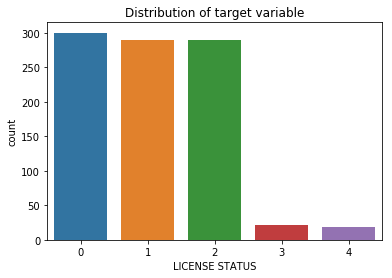

In [62]:
plt.title('Distribution of target variable')
sns.countplot(new_df['LICENSE STATUS'])
plt.show()

In [63]:
# # Our Subsample
# sub_sample_corr = new_df.corr()
# plt.figure(figsize=(20,20))
# sns.heatmap(sub_sample_corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':20}, cmap='Greens')
# plt.title('Subsample Correlation Matrix \n (use for reference)', fontsize=14)
# plt.show()

In [64]:
# Since all the years are highly correlated, we will consider the one that has the least missing values
col_list = ['PAYMENT YEAR', 'APPLICATION REQUIREMENTS COMPLETE YEAR', 'LICENSE APPROVED YEAR']
new_df = new_df.drop(col_list, axis=1)
test_data = test_data.drop(col_list, axis=1)

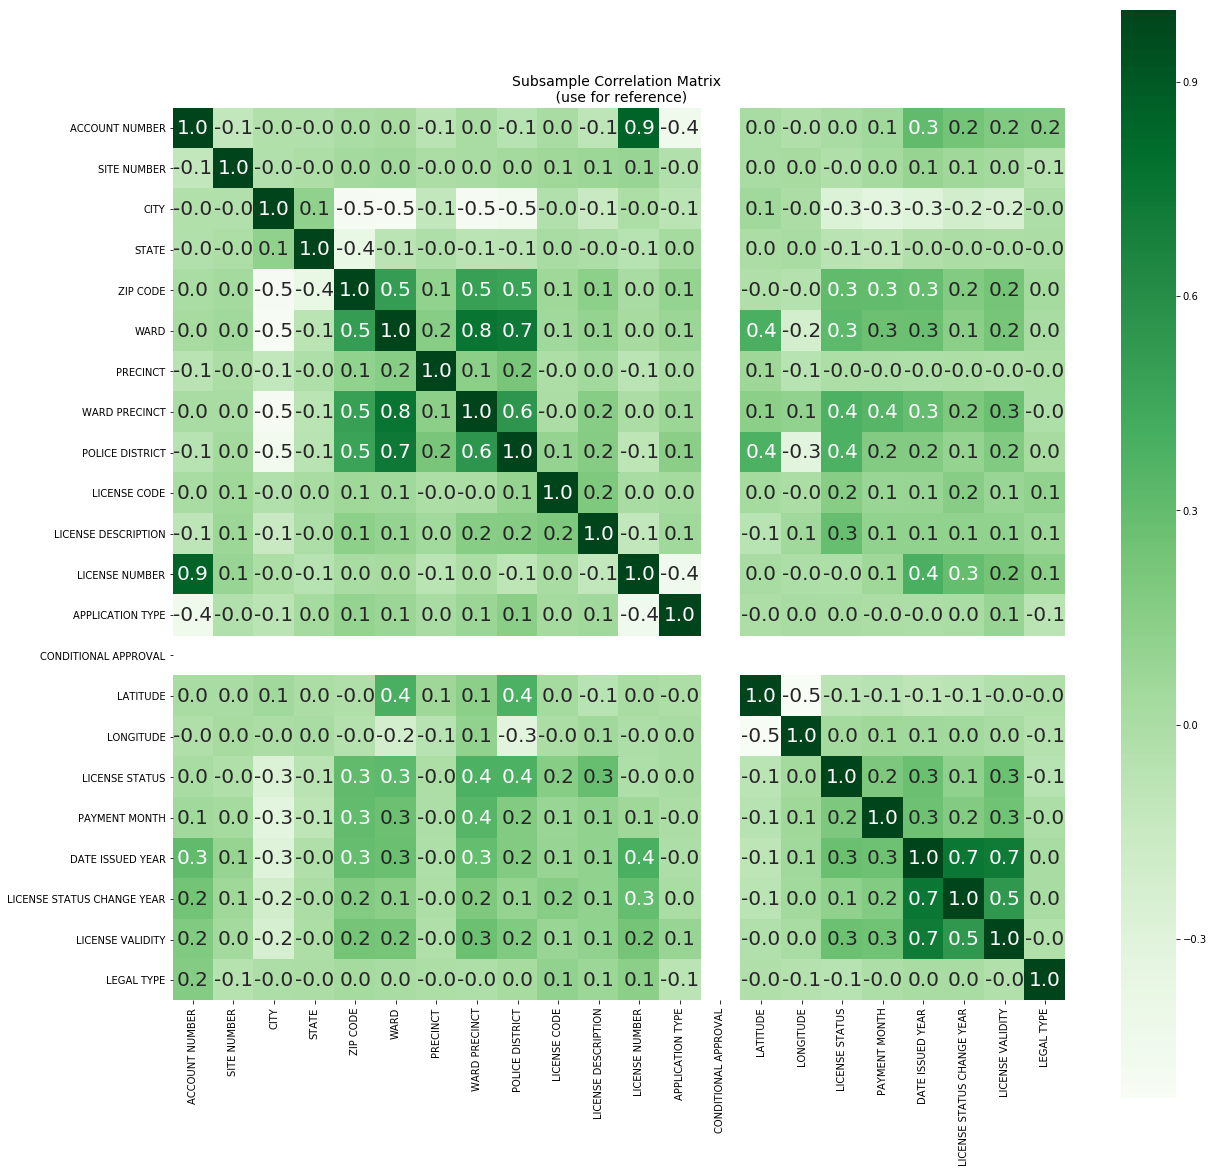

In [65]:
# Our Subsample
sub_sample_corr = new_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(sub_sample_corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':20}, cmap='Greens')
plt.title('Subsample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [66]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('LICENSE STATUS', axis=1)
y = new_df['LICENSE STATUS']

In [67]:
# Splitting the data into training set and testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [68]:
# Create confusion matrix function to find out sensitivity and specificity
from sklearn.metrics import confusion_matrix
def draw_cm(actual, predicted):
    cm = confusion_matrix( actual, predicted, [1,0]).T
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Yes","No"] , yticklabels = ["Yes","No"] )
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.show()

# Decision Tree Classifier

In [69]:
# Decision Tree Classifier

# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create a Decision tree classifier model
clf = DecisionTreeClassifier()

# # Hyperparameter Optimization
# parameters = [{'max_features': ['log2', 'sqrt','auto'], 
#               'criterion': ['entropy', 'gini'],
#               'max_depth': [2, 3, 5, 10, 50], 
#               'min_samples_split': [2, 3, 50, 100],
#               'min_samples_leaf': [1, 5, 8, 10]
#              }
# # Run the grid search
# grid_obj = GridSearchCV(clf, parameters)
# grid_obj = grid_obj.fit(X_train, y_train)

# # Set the clf to the best combination of parameters
# clf = grid_obj.best_estimator_

# Train the model using the training sets 
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [70]:
# Model prediction on train data
y_pred = clf.predict(X_train)

In [71]:
# Finding the variable with more importance
feature_importance = pd.DataFrame([X_train.columns, clf.tree_.compute_feature_importances()])
feature_importance = feature_importance.T.sort_values(by = 1, ascending=False)[1:10]

No handles with labels found to put in legend.


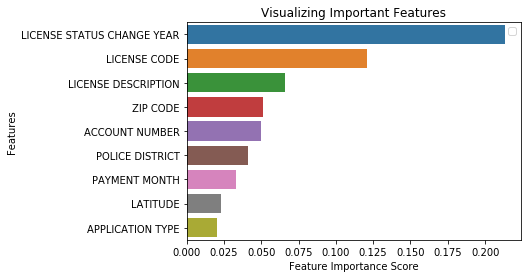

In [72]:
sns.barplot(x=feature_importance[1], y=feature_importance[0])
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [73]:
# Prediction on test set
y_pred = clf.predict(X_test)

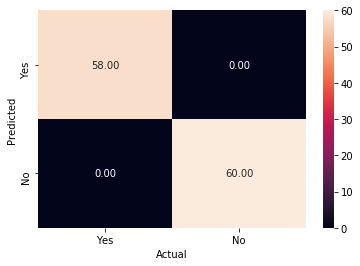

In [74]:
# Confusion matrix
draw_cm(y_test, y_pred)

In [75]:
# Calculating the accuracy, precision and the recall
acc_dt = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_dt )

Total Accuracy :  84.78


# Random Forest Classifier

In [76]:
# Random Forest Classifier

# Import library of RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# # Hyperparameter Optimization
# parameters = {'n_estimators': [4, 6, 9, 10, 15], 
#               'max_features': ['log2', 'sqrt','auto'], 
#               'criterion': ['entropy', 'gini'],
#               'max_depth': [2, 3, 5, 10], 
#               'min_samples_split': [2, 3, 5],
#               'min_samples_leaf': [1, 5, 8]
#              }

# # Run the grid search
# grid_obj = GridSearchCV(rf, parameters)
# grid_obj = grid_obj.fit(X_train, y_train)

# # Set the rf to the best combination of parameters
# rf = grid_obj.best_estimator_

# Train the model using the training sets 
rf.fit(X_train,y_train)

F:\Installed\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

No handles with labels found to put in legend.


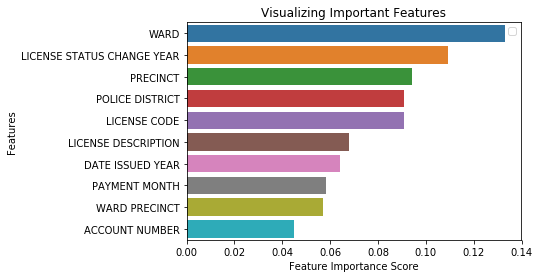

In [77]:
# Finding the variable with more importance
feature_imp = pd.Series(rf.feature_importances_,index= X_train.columns).sort_values(ascending=False)
# Creating a bar plot
feature_imp=feature_imp[0:10,]
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [78]:
# Prediction on test data
y_pred = rf.predict(X_test)

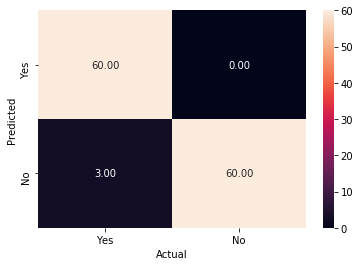

In [79]:
# Confusion metrix
draw_cm(y_test, y_pred)

In [80]:
# Calculating the accuracy, precision and the recall
acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Total Accuracy : ', acc_rf )

Total Accuracy :  86.09


# XGBoost

In [95]:
# eXtreme Gradient Boosting

# Import library of xgboost model
from xgboost import XGBClassifier

# # A parameter grid for XGBoost
# params = {
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5]
#         }

# Create a XGB Classifier
# xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic', silent=True, nthread=1)
# gbm = XGBClassifier(learning_rate = 0.02, n_estimators= 2000, max_depth= 4, min_child_weight= 2, gamma=1, subsample=0.8, 
#                     colsample_bytree=0.8, objective= 'binary:logistic', nthread= -1, scale_pos_weight=1)
# gbm = XGBClassifier()
gbm = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.1,
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=1, num_class=5, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=0.6, verbosity=1)


# Train the model using the training sets
gbm.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.1,
              learning_rate=0.02, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=1, num_class=5, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=0.6, verbosity=1)

In [97]:
# Prediction on test data
y_pred = gbm.predict(X_test)

In [98]:
# Calculating the accuracy, precision and the recall
acc_xgb = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Total Accuracy : ', acc_xgb )

Total Accuracy :  93.91


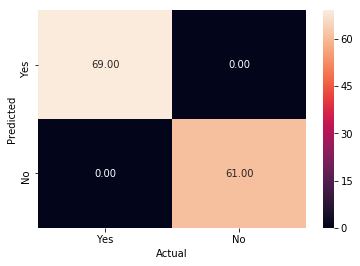

In [99]:
# Confusion matrix 
draw_cm(y_test, y_pred)

# Evaluation and comparision of all the models

In [100]:
models = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost'],
    'Score': [acc_dt, acc_rf, acc_xgb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,XGBoost,93.91
1,Random Forest,86.09
0,Decision Tree,84.78


## Selecting XGBoost as our best model

In [ ]:
# XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=0.6, gamma=0.1,
#               learning_rate=0.02, max_delta_step=0, max_depth=3,
#               min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
#               nthread=1, num_class=5, objective='multi:softprob',
#               random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
#               seed=None, silent=True, subsample=0.6, verbosity=1)

In [101]:
train_data.shape

(85895, 25)

In [102]:
test_data.shape

(57239, 21)

In [103]:
# Predicting on the test dataset
my_pred = gbm.predict(test_data)

In [104]:
my_pred.shape

(57239,)

In [105]:
my_submission['LICENSE STATUS'] = my_pred

In [106]:
my_submission.shape

(57239, 2)

In [107]:
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(0, 'AAI')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(1, 'AAC')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(2, 'REV')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(3, 'REA')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(4, 'INQ')

In [108]:
# Saving predictions to file
my_submission.to_csv('submission.csv', index=False)